<a href="https://colab.research.google.com/github/Sofigam00s/Aprendizaje-Automatico-IA/blob/main/TP1_AA1_regresion_lineal_GamalloSofia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

**Gamallo Sofia Antonia**

## Indicaciones b√°sicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compa√±ero.

4) copias expl√≠citas de secciones enteras del trabajo de otro ser√° penalizado disminuyendo su puntuaci√≥n.

5) No se olvide de a√±adir las fuentes de inspiraci√≥n de su c√≥digo (blogs, prompts de chatgpt o similar).

6) Adem√°s de todo el c√≥digo que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada secci√≥n. Esto le ayudar√° al momento del coloquio / parcial

7) Revise las fecha l√≠mite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien m√°s en el foro.
  - Puede comentar m√°s de un posteo de sus compa√±eros siempre y cuando el intercambio sea respetuoso y fruct√≠fero.
* Deben postear como soluci√≥n un enlace a su notebook colab p√∫blico y tambi√©n un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su soluci√≥n y explique lo realizado. Duraci√≥n m√°xima: 5 minutos. Puede grabarse a Ud. mismo usando una sesi√≥n de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces err√≥neos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicaci√≥n de Regresi√≥n Lineal y An√°lisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresi√≥n lineal a un dataset de su elecci√≥n, evaluar su rendimiento e identificar las variables m√°s relevantes para la predicci√≥n.

---

# **Instrucciones**:

#1. **Selecci√≥n del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables num√©ricas continuas (1 target, 3 o m√°s features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligi√≥. Continue al siguiente punto.  



## Resoluci√≥n:

Para este trabajo voy a utilizar un dataset sobre la estimaci√≥n de los niveles de obesidad seg√∫n los h√°bitos alimentarios y condici√≥n f√≠sica.

El link al dataset es el siguiente: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [ ]:
#Voy a comenzar leyendo el dataset
import pandas as pd #Para poder leerlo

dataset = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
dataset.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

# Descripci√≥n del dataset üìá

El dataset que utilizo se llama *'Estimation of obesity based on eating habits and physical condition'*.

Contiene datos sint√©ticos de personas, que sirven para modelar el √≠ndice de masa corporal (IMC) y estimar la categor√≠a de obesidad de un individuo en base a sus h√°bitos alimenticios, condiciones f√≠sicas y demogr√°ficas.

Este tipo de informaci√≥n puede ser √∫til en contextos de salud p√∫blica, nutrici√≥n y medicina preventiva, para identificar factores de riesgo relacionados con el sobrepeso y la obesidad.

# Descripci√≥n de las variables üî¢


*   **Gender:** g√©nero de la persona (maculino/femenino). Es de tipo categ√≥rica nominal.

*   **Age:** edad de las personas. Es de tipo num√©rica continua.

*   **Height:** altura en metros. Es de tipo num√©rica continua.

*   **Weight:** peso en kilos. Es de tipo num√©rica continua.

*   **family_history_with_overweight:** indica si hay antecedentes familiares de sobrepeso (yes/no). Es de tipo categ√≥rica nominal.

*   **FAVC:** si se consume con frecuencia alimentos con alto contenido cal√≥rico (yes/no). Es de tipo categ√≥rca nominal.

*   **FCVC:** frecuencia de consumo de verduras (1-3). Es te tipo num√©rica ordinal.

*   **NCP:** n√∫mero de comidas principales por d√≠a. Es de tipo num√©rica discreta.

*   **CAEC:** 	consumo de alimentos entre comidas (no/sometimes/frequently/always). Es de tipo categ√≥rica ordinal.

*   **SMOKE:** si fuma (yes/no). Es de tipo categ√≥rica nominal.

*   **CH20:** consumo de agua en litros. Es tipo num√©rica continua.

*   **SCC:** si monitorea su consumo cal√≥rico (yes/no). Es de tipo categ√≥rica nominal.

*   **FAF:** frecuencia de actividad f√≠sica semanal (horas). Es te tipo num√©rica continua.

*   **TUE:** 	tiempo diario usando dispositivos electr√≥nicos (horas). Es de tipo num√©rica continua.

*   **CALC:** 	consumo de alcohol (no/Sometimes/Frequently/Always). Es de tipo categ√≥rica ordinal.

*   **MTRANS:** medio de tranporte que utiliza (Bike/Car/Walking/Public/Motorbike). Es de tipo categ√≥rica nominal.

*   **NObeyesdad:** categor√≠a de obesidad seg√∫n el IMC. es de tipo categ√≥rica ordinal.


>Esta informaci√≥n se encuentra en el mismo link del dataset.





## 2. **An√°lisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribuci√≥n, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gr√°ficos de dispersi√≥n (scatterplots) entre features y target.  
   - **Pregunta clave**: ¬øQu√© relaciones lineales preliminares observan?  


## Resoluci√≥n:

#Target elegidoüü¢

Voy a utilizar como target al **IMC** (√≠ndice de masa corporal).
Para hacerlo tengo que crearlo, y lo hago utilizando las dos variables de peso y altura, ya que el IMC est√° dado por el c√°lculo de estas mismas.

Esto me permte plantear el problema como una regresi√≥n continua, m√°s adecuada para la regresi√≥n lineal, y m√°s √∫til en aplicaciones cl√≠nicas que requieren un valor exacto del √≠ndice de masa corporal.

Adem√°s, al utlizar este target, puedo eliminar 3 variables, el peso y la altura ya que ser√≠a redundante dejarlas, y ademas la variable *NObeyesdad* que describe en palabras el estado del peso, y estar√≠a aportando la misma informaci√≥n que el IMC solo que en palabras distintas.



In [ ]:
#Calculo el IMC con las variables peso y altura y lo agrego al dataset
dataset["IMC"] = dataset["Weight"] / (dataset["Height"] ** 2)

# Describir variables üìä

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21



> El dataset tiene 2111 registros y 18 columnas. No hay valores nulos en ninguna columna ya que todas contienen los mismos registros, as√≠ que no es necesario imputar datos faltantes.
Hay 9 variables num√©ricas y 9 variables categ√≥ricas.



In [ ]:
dataset.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE          IMC  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866    29.700159  
std       0.612953     0.850592     0.608927     8.011337  
min       1.000000     0.000000     0.000000    12.998685  
25%       1.584812     0.124505     0.000000    24.325802  
50%       2.000000     1.000000     0.625350    28.719089  
75%       2.477420     1.666678     1.000000    36.016501  
max       3.000000     3.000000     2.000000    50.811753



> Las variables se encuentran en rangos razonables, aunque hay algunas como el peso, la edad y el IMC con mayor rango y dispersi√≥n (esto puede indicar posibles outliers).



#Visualizaci√≥n de variables üìà


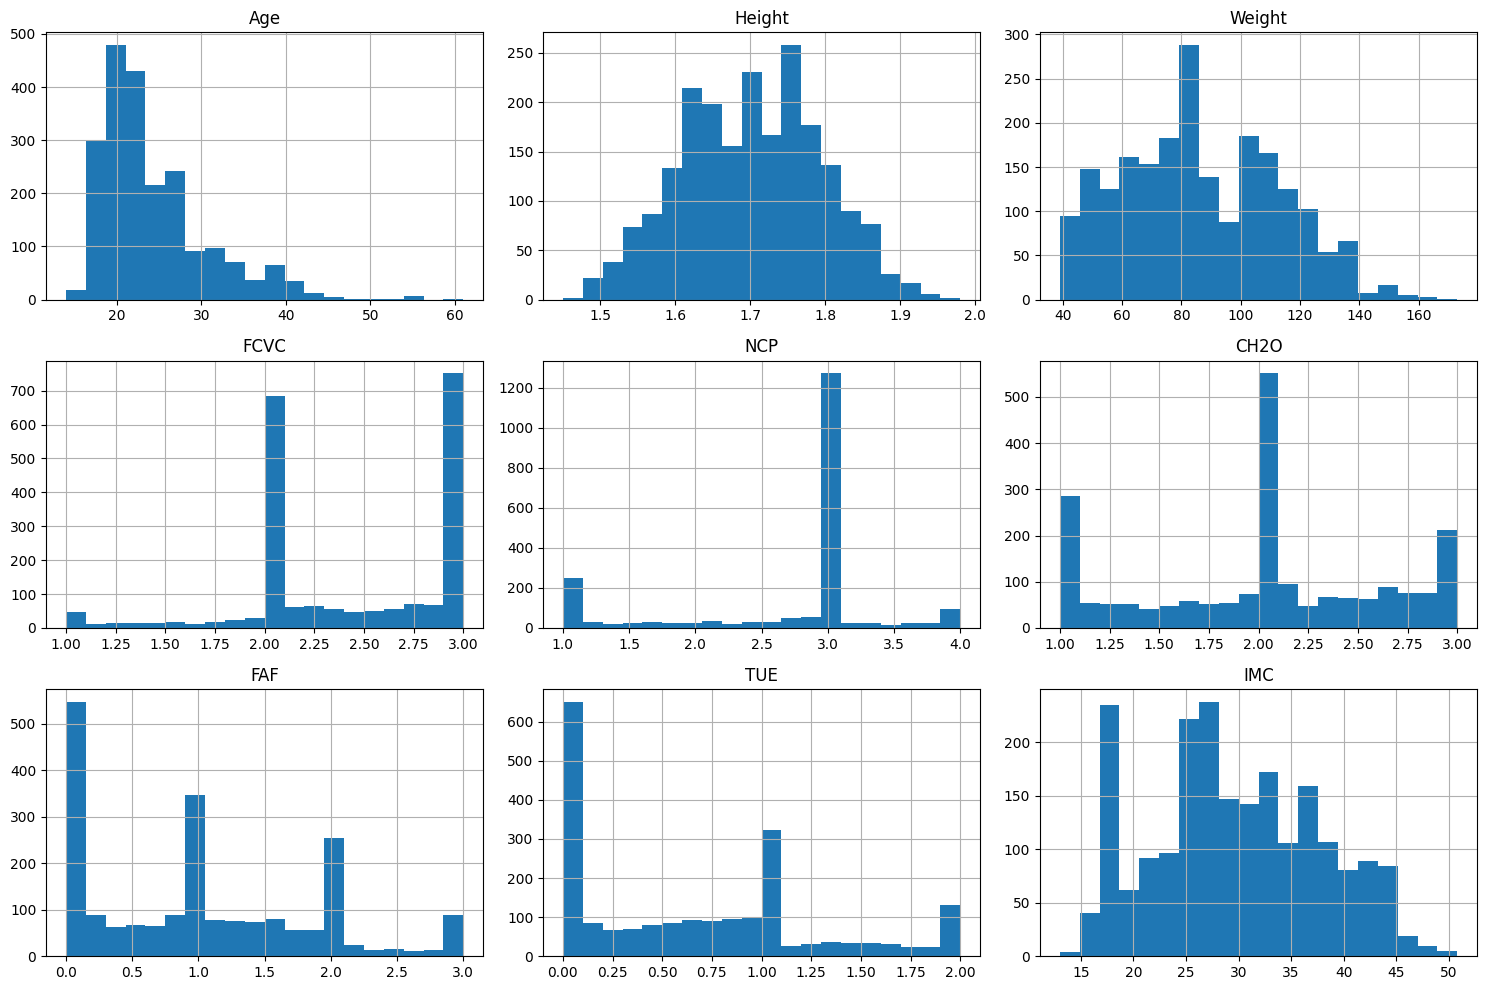

In [ ]:
# Histogramas de variables num√©ricas
import matplotlib.pyplot as plt
dataset.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()


**An√°lisis del historigrama**

* La altura y el peso son las mejores candidatas para el modelo por su forma y escala.

* La edad sirve si se transforma.

* Las dem√°s (FCVC, NCP, CH2O, FAF, TUE) no tienen distribuciones lineales claras. Hay que procesarlas para no confundir el modelo de regresi√≥n.



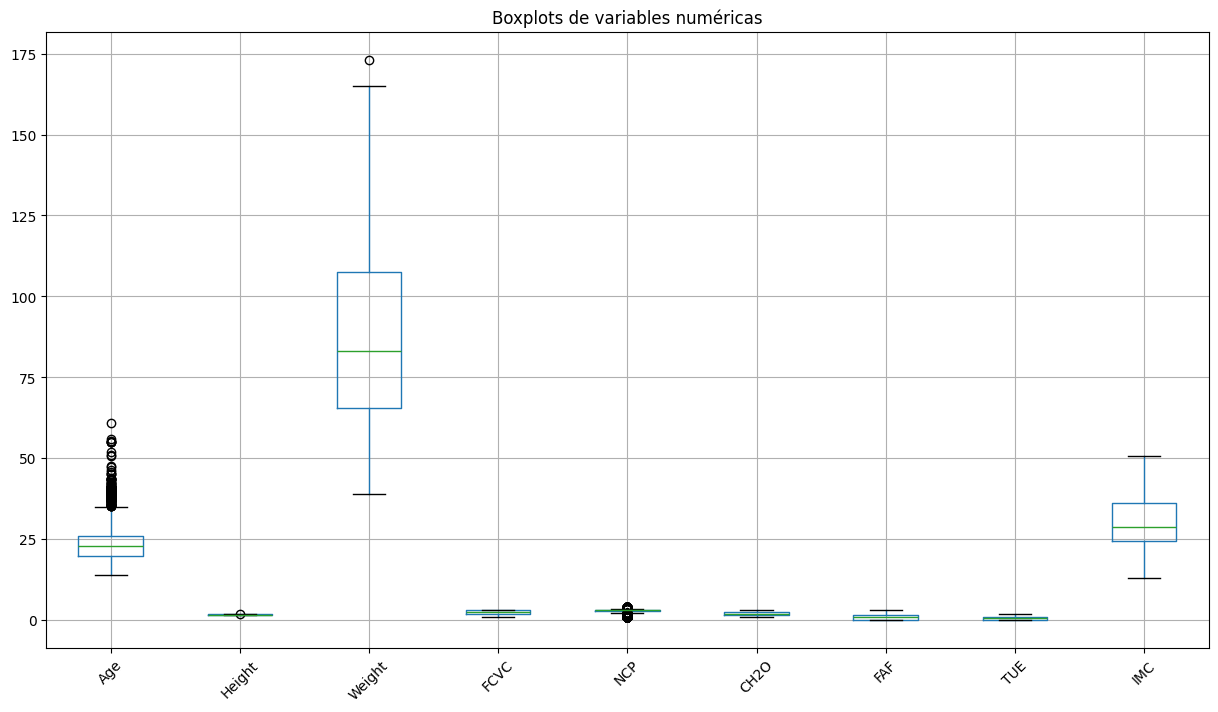

In [ ]:
# Boxplots de las variables num√©ricas
numeric_cols = dataset.select_dtypes(include='number').columns

plt.figure(figsize=(15,8))
dataset[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots de variables num√©ricas")
plt.show()


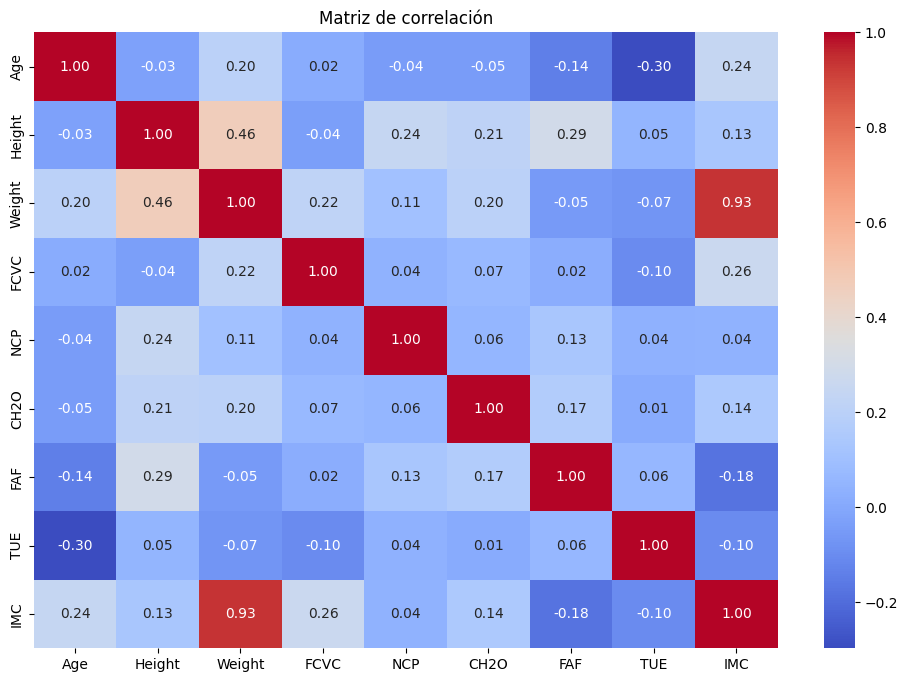

In [ ]:
# Matriz de correlaci√≥n
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(dataset[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaci√≥n")
plt.show()


**An√°lisis matriz de correlaci√≥n**

* La variable que m√°s se correlaciona con el BMI es el peso, con una correlaci√≥n muy alta de 0.93, lo cual tiene sentido ya que el BMI se calcula en funci√≥n del peso y la altura.

* La altura tiene una correlaci√≥n moderada con el peso (0.46), y una correlaci√≥n m√°s d√©bil con el BMI (0.13). Esto tambi√©n es l√≥gico: la altura influye en el c√°lculo del IMC, pero no tanto como el peso.

* Las variables relacionadas con h√°bitos saludables (FCVC, CH2O, FAF, TUE) presentan correlaciones bajas o negativas con el BMI, lo cual sugiere que una mayor frecuencia de consumo de vegetales, hidrataci√≥n y actividad f√≠sica podr√≠a estar asociada con un menor √≠ndice de masa corporal.

* La edad tiene una correlaci√≥n baja positiva con el BMI (0.24), indicando una tendencia leve a mayor IMC con el aumento de edad.

La mayor√≠a de las variables no est√°n fuertemente correlacionadas entre s√≠, lo cual sugiere que cada una aporta informaci√≥n relativamente distinta al conjunto de datos.

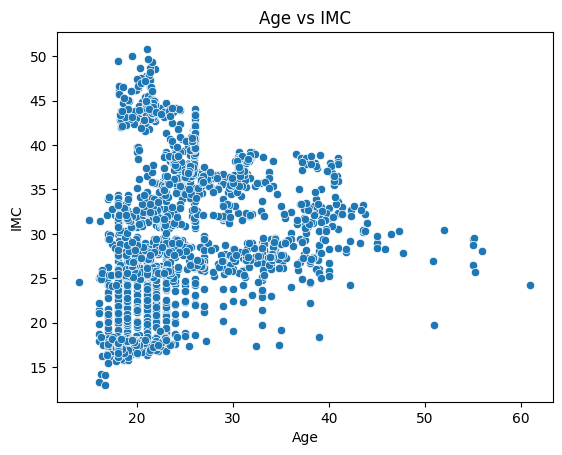

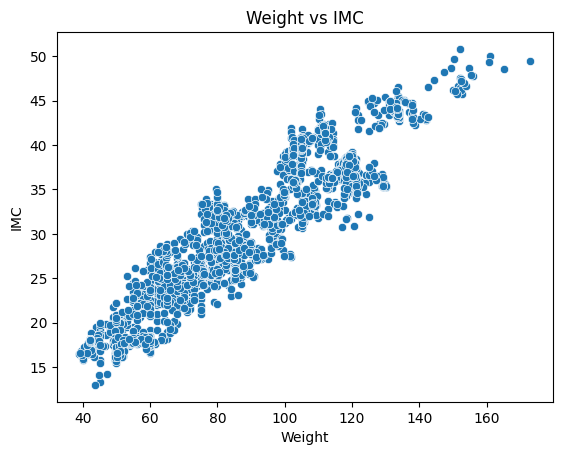

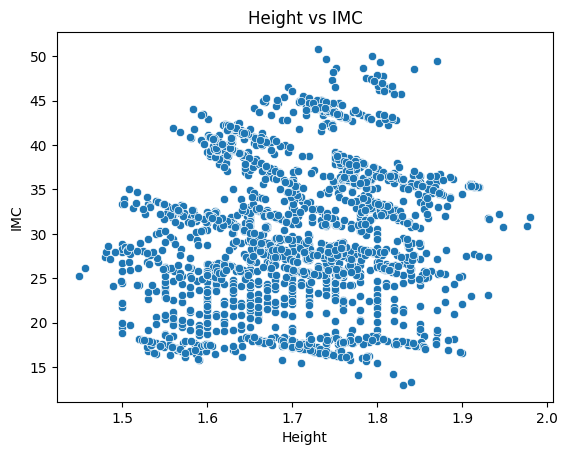

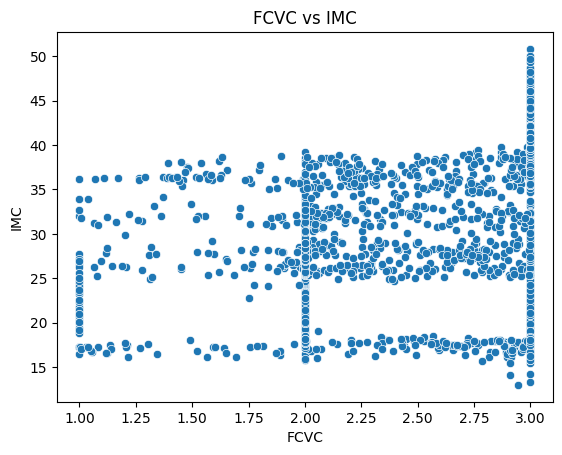

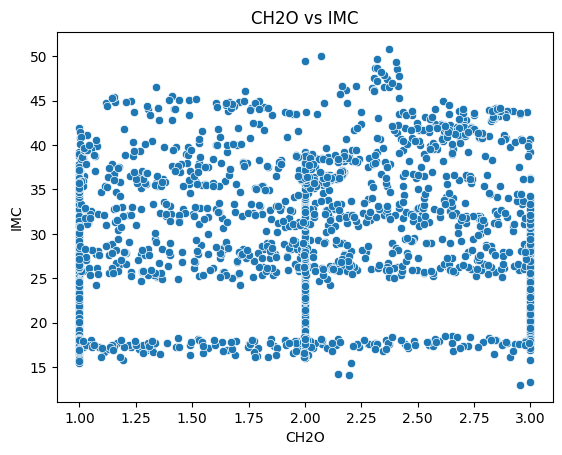

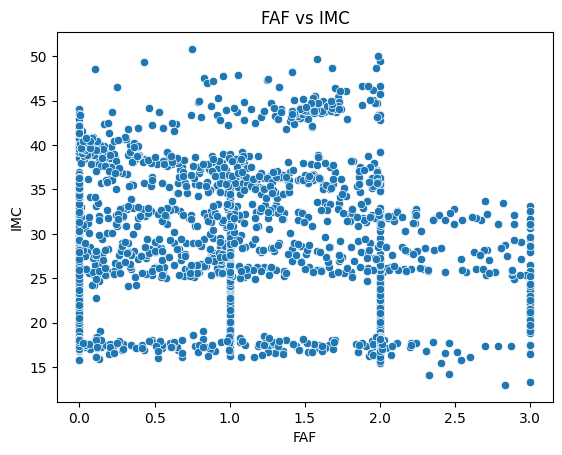

In [ ]:
# Scatterplots vs BMI
for col in ['Age', 'Weight', 'Height', 'FCVC', 'CH2O', 'FAF']:
    sns.scatterplot(data=dataset, x=col, y='IMC')
    plt.title(f'{col} vs IMC')
    plt.show()


**An√°lisis de graficos de dispersi√≥n entre el target y los features**

* Peso: Muestra una relaci√≥n lineal fuerte y positiva con el IMC, lo cual es esperado dado que el peso es parte de la f√≥rmula del IMC.
*  Edad, Altura, FCVC, CH2O y FAF: No muestran relaciones lineales claras con el IMC cuando se analizan individualmente.
* FCVC, CH2O y FAF aparecen como variables con valores espec√≠ficos, lo que puede limitar el an√°lisis.
* Existen agrupaciones visibles en ciertos valores de IMC (17-18, 25-30, y 35-40).
* Hay mayor variabilidad del IMC en algunos rangos de edad, particularmente en j√≥venes adultos.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cu√°les features descarta. Justifique.
   - Indique si usar√° o no variables categ√≥ricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes despu√©s.  
   - Dividan en train/test (70-30 o 80-20).  

## Resoluci√≥n:

#Limpieza üßº

Para a parte de limpieza solo voy a eliminar los outliers, porque como se vio anteriormente, el dataset no cuenta con ningun valor faltante. Estos Outliers que voy a eliminar son los que se vieron en los historigramas.

In [ ]:
def quitar(dataset, columns):
    for col in columns:
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        dataset = dataset[(dataset[col] >= lower) & (dataset[col] <= upper)]
    return dataset

# Columnas num√©ricas a revisar
column = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF']

# Aplicar la limpieza
dataset = quitar(dataset, column)


# Eliminar variables üßπ

Las variables que voy a eliminar son las siguientes:

* 'Weight' y 'Height': Como dije antes, estas variables conforman al target **IMC**, por lo que es redundante dejarlas.

* 'TUE' y 'SCC': ambas variables tienen una concentraci√≥n de registros en un mismo valor, lo que aporta baja diversidad y puede generar ruido al modelo.

In [ ]:
# Eliminar las columnas especificadas
dataset = dataset.drop(columns=['Weight', 'Height', 'TUE', 'SCC', 'NObeyesdad'])

# Verificar que las columnas se hayan eliminado correctamente
dataset.columns


Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'FAF', 'CALC', 'MTRANS', 'IMC'],
      dtype='object')

# Conversi√≥n de variables categ√≥ricas üî° ‚û°Ô∏è üî¢

Para convertir las variables categ√≥ricas a num√©ricas voy a utilizar dos formas distinta.

La primera es utilizar one-hot encoding para las variables categ√≥ricas nominales, ya que contienen solo dos tipos de informaci√≥n. Para ello utilizo la funci√≥n *get_dummies*.

Las variables categ√≥ricas ordinales solo tranformo las opciones a n√∫mero manualmente.



In [ ]:
dataset = pd.get_dummies(dataset, columns=['Gender', 'FAVC', 'family_history_with_overweight', 'SMOKE', 'MTRANS'], drop_first=True)


In [ ]:
orden_caec = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
dataset["CAEC"] = dataset["CAEC"].map(orden_caec)

orden_calc = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
dataset["CALC"] = dataset["CALC"].map(orden_calc)


In [ ]:
dataset

Age  FCVC  NCP  CAEC      CH2O       FAF  CALC        IMC  \
0     21.000000   2.0  3.0     1  2.000000  0.000000     0  24.386526   
1     21.000000   3.0  3.0     1  3.000000  3.000000     1  24.238227   
2     23.000000   2.0  3.0     1  2.000000  2.000000     2  23.765432   
3     27.000000   3.0  3.0     1  2.000000  2.000000     2  26.851852   
5     29.000000   2.0  3.0     1  2.000000  0.000000     1  20.195092   
...         ...   ...  ...   ...       ...       ...   ...        ...   
2106  20.976842   3.0  3.0     1  1.728139  1.676269     1  44.901475   
2107  21.982942   3.0  3.0     1  2.005130  1.341390     1  43.741923   
2108  22.524036   3.0  3.0     1  2.054193  1.414209     1  43.543817   
2109  24.361936   3.0  3.0     1  2.852339  1.139107     1  44.071535   
2110  23.664709   3.0  3.0     1  2.863513  1.026452     1  44.144338   

      Gender_Male  FAVC_yes  family_history_with_overweight_yes  SMOKE_yes  \
0           False     False                                True      False   
1           False     False                                True       True   
2            True     False                                True      False   
3            True     False                               False      False   
5            True      True                               False      False   
...           ...       ...                                 ...        ...   
2106        False      True                                True      False   
2107        False      True                                True      False   
2108        False      True                                True      False   
2109        False      True                                True      False   
2110        False      True                                True      False   

      MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0           False             False                          True   
1           False             False                          True   
2           False             False                          True   
3           False             False                         False   
5           False             False                         False   
...           ...               ...                           ...   
2106        False             False                          True   
2107        False             False                          True   
2108        False             False                          True   
2109        False             False                          True   
2110        False             False                          True   

      MTRANS_Walking  
0              False  
1              False  
2              False  
3               True  
5              False  
...              ...  
2106           False  
2107           False  
2108           False  
2109           False  
2110           False  

[1399 rows x 16 columns]



> Se visulizan que todas las variables est√°n convertidas a tipo num√©ricas.


# Escalar feautures y dividir train/test üßÆ

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separa variables independientes y target
X = dataset.drop("IMC", axis=1)
y = dataset["IMC"]

# Escala las features usando StandardScaler en train y aplicar la misma transformaci√≥n a test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar en train
X_test_scaled = scaler.transform(X_test)  # Transformar test con el mismo scaler

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## 4. **Regresi√≥n Lineal**  
   - Ajusten un modelo de regresi√≥n lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar m√©tricas en el set de entrenamiento y en el de testeo: **R¬≤**, MSE (error cuadr√°tico medio), MAE.  


#Obtener modeo de Regresi√≥n Linealüìà

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#Coeficientes y m√©tricas üìä

In [ ]:
# Intercepto
print("Intercepto:", model.intercept_)

# Coeficientes y nombres de columnas
feature_names = X.columns
coeficientes = pd.Series(model.coef_, index=feature_names)
print("Coeficientes:\n", coeficientes.sort_values(ascending=False))

Intercepto: 5.268234139759905
Coeficientes:
 family_history_with_overweight_yes    8.009228
FAVC_yes                              3.428085
FCVC                                  3.177357
MTRANS_Public_Transportation          3.080684
MTRANS_Bike                           2.100446
CALC                                  1.994701
MTRANS_Motorbike                      1.761559
CH2O                                  0.846693
Age                                   0.497267
MTRANS_Walking                        0.021040
FAF                                  -0.247111
SMOKE_yes                            -0.828973
NCP                                  -0.874959
Gender_Male                          -2.635797
CAEC                                 -4.401469
dtype: float64


Los coeficientes que m√°s influyen en el IMC son el historial de sobrepeso familiar, el consumo frecuente de alimentos altos en calor√≠as, el consumo de verduras y el uso del tranporte p√∫blico.

A la inversa, las variables menos influyentes en el IMC (lo que quiere decir que afectan a un bajo nivel de √≠ndice corporal) son; fumar, la cantidad de comidas consumidad, el genero(en este caso, ser hombre indica un menor porcentaje de IMC) y el consumo de alimentos fuera de las comidas principales.

Estos coeficientes en conjunto, reflejan una posble realidad del √≠ndice de obesidad en la personas, teninedo en cuenta mayormente su h√°bitos alimenticios.

In [ ]:
# Entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Test
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nM√©tricas en TRAIN:")
print(f"R¬≤: {r2_train:.4f} | MSE: {mse_train:.4f} | MAE: {mae_train:.4f}")

print("\nM√©tricas en TEST:")
print(f"R¬≤: {r2_test:.4f} | MSE: {mse_test:.4f} | MAE: {mae_test:.4f}")



M√©tricas en TRAIN:
R¬≤: 0.5062 | MSE: 36.2304 | MAE: 4.7205

M√©tricas en TEST:
R¬≤: 0.5047 | MSE: 31.8979 | MAE: 4.4289


**An√°lisis de las m√©tricas**

Las m√©tricas tanto en el entrenamiento como en el testeo son muy similirales, incluso un ponco mejor en el testo, esto genera un buen rendimiento del modelo e indica que no hay un sobreajuste.
El R^2 en 0.50 indica que el modelo mide la mitad de la vairabilidad del IMC. Si bien un es un valor alto, todav√≠a es aceptable para un modelo lineal.
El MSE tiene valores moderados.
El MAE indica que el modelo se desv√≠a alrededor de 4/5 unidades de IMC. Esto es razonable porque puede representar un cambio de categor√≠a (de peso normal, a sobrepeso).



## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos ‚Üí mayor impacto en el target.  
     - Signo: Relaci√≥n positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver c√≥mo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen m√©todos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. M√°s info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resoluci√≥n:

#Comparaci√≥n de coeficientes e importancia üîç

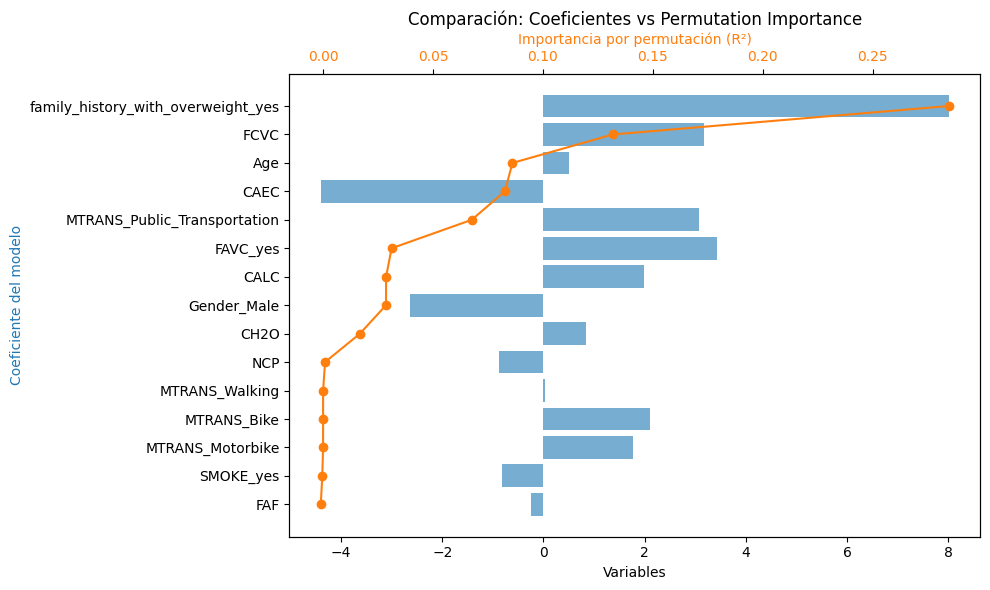

In [ ]:
from sklearn.inspection import permutation_importance
# Obtener coeficientes del modelo entrenado
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model.coef_
})

# Permutation Importance sobre el set de test
result = permutation_importance(
    model, X_test, y_test,
    n_repeats=30, random_state=42, scoring='r2'
)

perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'permutation_importance': result.importances_mean,
    'std': result.importances_std
})

# Unir ambos DataFrames por la columna 'feature'
combined_df = coef_df.merge(perm_df, on='feature')
# Ordenar por importancia de permutaci√≥n para visualizaci√≥n
combined_df = combined_df.sort_values(by='permutation_importance', ascending=False)

# --- Gr√°fico conjunto ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gr√°fico de barras para coeficientes
color = 'tab:blue'
ax1.set_xlabel('Variables')
ax1.set_ylabel('Coeficiente del modelo', color=color)
ax1.barh(combined_df['feature'], combined_df['coefficient'], color=color, alpha=0.6, label='Coeficiente')
ax1.tick_params(axis='y')
ax1.invert_yaxis()

# Segundo eje para la importancia por permutaci√≥n
ax2 = ax1.twiny()
color = 'tab:orange'
ax2.set_xlabel('Importancia por permutaci√≥n (R¬≤)', color=color)
ax2.plot(combined_df['permutation_importance'], combined_df['feature'], 'o-', color=color, label='Permutaci√≥n')
ax2.tick_params(axis='x', labelcolor=color)

# T√≠tulo y ajuste
plt.title('Comparaci√≥n: Coeficientes vs Permutation Importance')
plt.tight_layout()
plt.show()

#An√°lisis de comparaci√≥n üî¨
* La variable de historial familiar con sobrepeso tiene el coeficiente positivo m√°s alto y tambi√©n la mayor importancia por permutaci√≥n. Esto indica que tener antecedentes familiares de sobrepeso es un gran predctor para el IMC.

* La frecuencia del consumo de vegetales y la edad tambi√©n presentan alto impacto en ambas m√©tricas, lo que valida su relevancia.

* Algunas variables como el consumo de alimentos entre comidas tienen un coeficiente alto negativo pero relativamente baja importancia por permutaci√≥n. Esto sugiere que, aunque el modelo les asigna peso, podr√≠an estar correlacionadas con otras variables o tener un efecto menos independiente.

* Por el contrario, variables como CH2O, FAF o NCP presentan tanto coeficientes bajos como baja importancia por permutaci√≥n, lo cual sugiere que podr√≠an eliminarse del modelo sin deteriorar el rendimiento.

**En conclusi√≥n** el modelo lineal entrenado logra explicar la mitad de la variaci√≥n del IMC usando variables relacionadas al estilo de vida, transporte, alimentaci√≥n y antecedentes familiares. Si bien el modelo puede mejorar, esta regresi√≥n lineal es una base s√≥lida, interpretable y funcional, ideal para un an√°lisis explicativo y para identificar los factores que m√°s influyen en el peso corporal.



## 6. **Reflexi√≥n**  
   - ¬øCu√°les variables son m√°s importantes seg√∫n el modelo? ¬øCoincide con su an√°lisis exploratorio?  
   - ¬øEl modelo tiene buen rendimiento (R¬≤ alto, MSE bajo)? Si no, ¬øa qu√© podr√≠a deberse?  



## Resoluci√≥n:

# Variables m√°s importantes‚úÖ

Tanto el an√°lisis de coeficientes del modelo lineal como el m√©todo de Permutation Importance coinciden en que las variables m√°s influyentes para predecir el IMC son:

* **'family_history_with_overweight_yes:'** tener antecedentes familiares de sobrepeso.

* **'FCVC:'** frecuencia de consumo de vegetales.

* **'Age:'** la edad tambi√©n tiene un impacto moderado.

* **'CAEC:'** frecuencia de comer entre comidas.

* **'MTRANS_Public_Transportation:'** medio de transporte, reflejando el nivel de actividad f√≠sica.

Estas variables no solo muestran un coeficiente alto en el modelo, sino que al ser desordenadas aumentan el error, lo que confirma su relevancia.

**Las variables m√°s importantes coinciden con mi an√°lisis exploratorio.**

En los gr√°ficos y correlaciones previas, se observaba que la edad, la historia familiar y los h√°bitos alimenticios estaban relacionados con el IMC. Tambi√©n se hab√≠a notado que el medio de transporte pod√≠a estar vinculado con la actividad f√≠sica y, por lo tanto, con el peso corporal. Esto demuestra coherencia entre el an√°lisis exploratorio de datos y los resultados obtenidos por el modelo.


# Rendimiento del modelo üîã

El modelo tiene R¬≤ de 0.50 en el set de test, esto indica que el modelo explica el 50% de la variabilidad del IMC. Es un valor moderado, no perfecto, pero razonable para un modelo lineal con variables de estilo de vida.

**¬øA qu√© podr√≠a deberse?**

* El modelo lineal es muy b√°sico, no puede entender relaciones complicadas entre las variables.
* Los datos no son perfectos, muchas variables son categ√≥ricas.
* El IMC depende de muchas cosas, hay factores importantes que no est√°n en los datos, como la gen√©tica, las hormonas o el metabolismo de cada persona.

**En conclusi√≥n**, el modelo tiene un rendimiento aceptable para un enfoque simple como la regresi√≥n lineal, y los resultados son coherentes con lo explorado. Se identificaron variables importantes que tienen sentido, aunque para mejorar el rendimiento se necesitan modelos m√°s complejos (como un random forest) o datasets mas completos con m√°s variables.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¬øMejora el rendimiento?  

#Eliminar y reentrenar ‚öôÔ∏è

Para este nuevo modelo voy a elegir las 7 variables con menos importancia:

* CH2O
* NCP
* MTRANS_Walking
* MTRANS_Bike
* MTRANS_Motorbike
* SMOKE_yes
* FAF

In [ ]:
# Eliminar las columnas
dataset = dataset.drop(columns=['CH2O', 'NCP', 'MTRANS_Walking', 'MTRANS_Bike', 'MTRANS_Motorbike', 'SMOKE_yes', 'FAF'])
dataset2 = dataset
# Verificar que las columnas se hayan eliminado correctamente
dataset2.columns


Index(['Age', 'FCVC', 'CAEC', 'CALC', 'IMC', 'Gender_Male', 'FAVC_yes',
       'family_history_with_overweight_yes', 'MTRANS_Public_Transportation'],
      dtype='object')

In [ ]:
# Separa variables independientes y target
X = dataset2.drop("IMC", axis=1)
y = dataset2["IMC"]

# Escala las features usando StandardScaler en train y aplicar la misma transformaci√≥n a test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar en train
X_test_scaled = scaler.transform(X_test)  # Transformar test con el mismo scaler

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Test
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nM√©tricas en TRAIN:")
print(f"R¬≤: {r2_train:.4f} | MSE: {mse_train:.4f} | MAE: {mae_train:.4f}")

print("\nM√©tricas en TEST:")
print(f"R¬≤: {r2_test:.4f} | MSE: {mse_test:.4f} | MAE: {mae_test:.4f}")


M√©tricas en TRAIN:
R¬≤: 0.5017 | MSE: 36.5618 | MAE: 4.7792

M√©tricas en TEST:
R¬≤: 0.4954 | MSE: 32.4920 | MAE: 4.4986


**An√°lisis de m√©tricas**

El nuevo modelo con las variables eliminadas, muestra muy poca diferencia con el modelo original, tanto en el original como en el nuevo, los valores de R^2, MSE y MAE, son similirales tanto en el entrenamiento como en el testeo. Aunque este nuevo modelo tiene una leve empeora, sigue indicando un buen rendimiento sin sobreajuste.
Esto comprueba que las variables con menor importnacia no aportan relevancia al modelo.


#CONCLUSI√ìN FINAL

Este trabajo me permiti√≥ aplicar un modelo de regresi√≥n lineal en un contexto real, lo que me ayud√≥ a comprender mejor su funcionamiento. Reforc√© conocimientos como la limpieza de datos, la manipulaci√≥n de valores nulos y outliers, y la importancia de analizar las variables antes de entrenar un modelo. La visualizaci√≥n de variables fue fundamental para detectar patrones, relaciones y posibles errores, y aprend√≠ que interpretar correctamente un gr√°fico puede cambiar la lectura de los resultados.

Uno de los mayores aprendizajes fue el uso del Permutation Importance, una herramienta que aporta informaci√≥n valiosa sobre el peso real de cada variable en el modelo, superando en algunos casos a la simple interpretaci√≥n de coeficientes. Sin embargo, esta parte tambi√©n fue una de las m√°s desafiantes, ya que nunca hab√≠a trabajado con estas m√©tricas, y me llev√≥ tiempo entender su l√≥gica y c√≥mo interpretarlas correctamente. Lo mismo me paso con la interpretaci√≥n r√°pida de gr√°ficos, que me llevo m√°s tiempo de lo que esperaba.


---

### **Tips**:  
- Si el R¬≤ es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¬°la trazabilidad es clave en ciencia de datos!  
